In [ ]:
import glob
import pandas as pd
import numpy as np
import folium
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from tqdm import tqdm

In [2]:
file_list = glob.glob("./image/*.png")

In [3]:
file_list

['./image/367144080.png',
 './image/316025932.png',
 './image/369134000.png',
 './image/316003900.png',
 './image/373676000.png',
 './image/563135000.png',
 './image/338922000.png',
 './image/316015742.png',
 './image/316003544.png',
 './image/367309710.png',
 './image/366824910.png',
 './image/367544180.png',
 './image/987654321.png',
 './image/636016069.png',
 './image/249876000.png',
 './image/316030644.png',
 './image/367450580.png',
 './image/338221000.png',
 './image/538005194.png',
 './image/316003459.png',
 './image/316006922.png',
 './image/366245070.png',
 './image/338955000.png',
 './image/338926959.png',
 './image/316182000.png',
 './image/210842000.png',
 './image/369915000.png',
 './image/366773030.png',
 './image/338050648.png',
 './image/338526000.png',
 './image/245968000.png',
 './image/636017000.png',
 './image/366659730.png',
 './image/367115680.png',
 './image/316011408.png',
 './image/367789420.png',
 './image/316015632.png',
 './image/316001251.png',
 './image/31

In [4]:
temp = list(map(lambda x: x[8:], file_list))

In [10]:
temp1 = list(map(lambda x: x[:-4], temp))

In [11]:
temp1

['367144080',
 '316025932',
 '369134000',
 '316003900',
 '373676000',
 '563135000',
 '338922000',
 '316015742',
 '316003544',
 '367309710',
 '366824910',
 '367544180',
 '987654321',
 '636016069',
 '249876000',
 '316030644',
 '367450580',
 '338221000',
 '538005194',
 '316003459',
 '316006922',
 '366245070',
 '338955000',
 '338926959',
 '316182000',
 '210842000',
 '369915000',
 '366773030',
 '338050648',
 '338526000',
 '245968000',
 '636017000',
 '366659730',
 '367115680',
 '316011408',
 '367789420',
 '316015632',
 '316001251',
 '316021382',
 '316001268',
 '366947000',
 '316003871',
 '316004981',
 '367708380',
 '375181000',
 '316011649',
 '368682000',
 '298831896',
 '256202000',
 '369493412',
 '368371000',
 '368446000',
 '366773090',
 '319421001',
 '367060330',
 '316001759',
 '367700050',
 '316003779',
 '367594860',
 '565464000',
 '256613000',
 '316001237',
 '367477680',
 '367013040',
 '367709140',
 '316001310',
 '367531220',
 '374122000',
 '366976870',
 '209270000',
 '369970413',
 '2398

In [2]:
with open("./filelist.txt") as file:
    mmsi = file.read().splitlines()

In [6]:
small_fuca = pd.read_csv("./data/fuca/small_fuca.csv")

In [12]:
mmsi = list(map(lambda x: int(x), mmsi))

In [18]:
len(mmsi)

405

In [3]:
mmsi

['367144080',
 '316025932',
 '369134000',
 '316003900',
 '373676000',
 '563135000',
 '338922000',
 '316015742',
 '316003544',
 '367309710',
 '366824910',
 '367544180',
 '987654321',
 '636016069',
 '249876000',
 '316030644',
 '367450580',
 '338221000',
 '538005194',
 '316003459',
 '316006922',
 '366245070',
 '338955000',
 '338926959',
 '316182000',
 '210842000',
 '369915000',
 '366773030',
 '338050648',
 '338526000',
 '245968000',
 '636017000',
 '366659730',
 '367115680',
 '316011408',
 '367789420',
 '316015632',
 '316001251',
 '316021382',
 '316001268',
 '366947000',
 '316003871',
 '316004981',
 '367708380',
 '375181000',
 '316011649',
 '368682000',
 '298831896',
 '256202000',
 '369493412',
 '368371000',
 '368446000',
 '366773090',
 '319421001',
 '367060330',
 '316001759',
 '367700050',
 '316003779',
 '367594860',
 '565464000',
 '256613000',
 '316001237',
 '367477680',
 '367013040',
 '367709140',
 '316001310',
 '367531220',
 '374122000',
 '366976870',
 '209270000',
 '369970413',
 '2398

In [7]:
has_loitering = {367144080: 75,
 316015742: 21,
 366824910: 162,
 367544180: 245,
 316030644: 3874,
 367450580: 143,
 316003459: 43,
 338926959: 5,
 316182000: 14,
 366773030: 6548,
 366659730: 782,
 316015632: 13,
 316001251: 52,
 316021382: 50,
 316004981: 3,
 367708380: 62,
 375181000: 6}

In [16]:
nlen = len(mmsi)
cur = 57
for MMSI in mmsi[57:]:
    # MMSI에 대한 기록 추출
    rec1 = small_fuca[small_fuca['MMSI'] == MMSI].sort_values('BaseDateTime', ascending=True).reset_index(drop=True)

    Dk = rec1['Length'].min() * 0.001 * 4.5
    # print(Dk)
    m = 60*5
    def is_stopping_point(prev, cur):
        a = prev[0] - cur['LAT']
        b = prev[1] - cur['LON']
        dist = math.sqrt((a*a + b*b)) * 111.32
        # print(dist)
        if dist < Dk:
            return True
        else:
            return False

    # stopping points 제거
    index = []      # moving points 저장하는 리스트
    moving_points = []
    cur_loc = rec1.loc[0]
    index.append(0)
    start_index = 0
    end_index = 0
    flag = -1
    moving_points.append((cur_loc['LAT'], cur_loc['LON']))

    for i in range(1, len(rec1)):
        cur_loc = rec1.loc[i]
        prev_loc = moving_points[-1]
        if is_stopping_point(prev_loc, cur_loc):
            if flag == 0:
                start_index = i
                flag = 1
        else:
            if flag == 1:
                end_index = i-1
                flag = 0
                term = pd.to_datetime(rec1['BaseDateTime'][end_index]) - pd.to_datetime(rec1['BaseDateTime'][start_index])
                if term < timedelta(minutes=60):
                    index.extend(x for x in range(start_index, end_index+1))
            elif flag == -1:
                flag = 0

            moving_points.append((cur_loc['LAT'], cur_loc['LON']))
            index.append(i)

    # moving points만 추출
    moving = rec1.reset_index(drop=True).iloc[index].reset_index()

    # grid mapping. z=16
    z = 16
    moving['x'] = ((moving["LON"] + 180) / 360) * (2 ** z)
    moving['y'] = (1 - np.log(np.tan(math.pi * moving["LAT"] / 180) + 1 / np.cos(math.pi * moving["LAT"] / 180)) / math.pi) * (2 ** (z - 1))

    # moving trajectory 시작 index 저장하기
    MT_index = []
    for i in range(1, len(moving['index'])):
        diff = moving['index'][i] - moving['index'][i-1]
        if diff > 1:
            MT_index.append(i)
    # print(len(MT_index))

    # n, c 계산
    cnt = 0
    loitering_index = []
    for i in tqdm(range(len(MT_index)-1), desc=f'{cur}/{nlen}'):
        if MT_index[i+1] - MT_index[i] < m: continue
        MT = moving.iloc[MT_index[i]:MT_index[i+1]]
        for k in range(0, len(MT)-m, 10):
            MT1 = MT.iloc[k:k+m]
            n_o = []
            for j in range(len(MT1)):
                n_o.append((np.floor(MT1.iloc[j]['x']), np.floor(MT1.iloc[j]['y'])))
            n_o = len(set(n_o))
            n_c = 0
            for j in range(len(MT1)-1):
                dx = np.abs(np.floor(MT1.iloc[j]['x']) - np.floor(MT1.iloc[j+1]['x']))
                dy = np.abs(np.floor(MT1.iloc[j]['y']) - np.floor(MT1.iloc[j+1]['y']))
                n_c += max(max(dx, dy)-1, 0)
            n = n_o + n_c
            c = ((np.ceil(MT1['x'].max()) - np.floor(MT1['x'].min())) + (np.ceil(MT1['y'].max()) - np.floor(MT1['y'].min()))) * 2
            if n >= c:
                cnt += 1
                loitering_index.append(MT_index[i]+k)
        #     print(n_o, n_c, n, c)
        # print(cnt)
        del MT
    if cnt > 0:
        has_loitering[MMSI] = cnt
        # print(MMSI, cnt)

    cur += 1
    del rec1, moving

58/405: 100%|██████████| 14/14 [01:30<00:00,  6.46s/it]
59/405: 0it [00:00, ?it/s]
60/405: 100%|██████████| 6/6 [00:27<00:00,  4.61s/it]
61/405: 0it [00:00, ?it/s]
62/405: 0it [00:00, ?it/s]
63/405: 0it [00:00, ?it/s]
64/405: 100%|██████████| 105/105 [00:24<00:00,  4.24it/s]
65/405: 0it [00:00, ?it/s]
67/405: 100%|██████████| 1/1 [00:12<00:00, 12.35s/it]
68/405: 0it [00:00, ?it/s]
72/405: 100%|██████████| 50/50 [02:25<00:00,  2.90s/it]
73/405: 0it [00:00, ?it/s]
77/405: 100%|██████████| 88/88 [09:07<00:00,  6.22s/it]
78/405: 0it [00:00, ?it/s]
81/405: 100%|██████████| 16/16 [00:04<00:00,  3.79it/s]
82/405: 0it [00:00, ?it/s]
83/405: 0it [00:00, ?it/s]
84/405: 0it [00:00, ?it/s]
89/405: 100%|██████████| 41/41 [00:07<00:00,  5.80it/s]
90/405: 0it [00:00, ?it/s]
93/405: 100%|██████████| 9/9 [01:09<00:00,  7.75s/it]
94/405: 0it [00:00, ?it/s]
96/405: 100%|██████████| 38/38 [00:04<00:00,  8.33it/s]
97/405: 0it [00:00, ?it/s]
98/405: 0it [00:00, ?it/s]
99/405: 0it [00:00, ?it/s]
101/405: 100

In [10]:
small_fuca

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo
0,367480370,2017-01-01T00:01:20,48.75449,-122.50550,0.0,-160.2,189.0,DEBRA D,IMO8851479,WDF7030,1001.0,undefined,30.97,7.30,NaN,NaN
1,367480370,2017-01-01T00:02:30,48.75448,-122.50550,0.0,-134.7,190.0,DEBRA D,IMO8851479,WDF7030,1001.0,undefined,30.97,7.30,NaN,NaN
2,366765940,2017-01-01T00:03:09,46.20044,-123.75889,0.0,-84.0,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
3,366765940,2017-01-01T00:00:00,46.20045,-123.75886,0.0,-103.9,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
4,366765940,2017-01-01T00:02:07,46.20043,-123.75890,0.0,-89.4,511.0,SEA CLIPPER,IMO7520633,WCZ2553,1001.0,undefined,25.06,7.32,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30477090,316007587,2017-12-31T23:52:20,49.11955,-123.16823,0.0,-99.6,511.0,PACIFIC VIKING,IMO8744937,NaN,1001.0,reserved for future use (9),24.27,6.86,NaN,NaN
30477091,367479990,2017-12-31T23:53:20,48.14515,-122.67284,10.0,17.1,26.0,WSF KENNEWICK,IMO9618331,WDF6991,1012.0,undefined,83.39,19.50,NaN,NaN
30477092,316007587,2017-12-31T23:53:29,49.11953,-123.16822,0.0,-121.9,511.0,PACIFIC VIKING,IMO8744937,NaN,1001.0,reserved for future use (9),24.27,6.86,NaN,NaN
30477093,367448380,2017-12-31T23:57:45,48.72098,-122.51480,0.0,54.5,511.0,NORTHWIND,IMO7100316,WDF4133,1001.0,undefined,25.09,8.10,NaN,NaN


In [22]:
has_loitering

{367144080: 75,
 316015742: 21,
 366824910: 162,
 367544180: 245,
 316030644: 3874,
 367450580: 143,
 316003459: 43,
 338926959: 5,
 316182000: 14,
 366773030: 6548,
 366659730: 782,
 316015632: 13,
 316001251: 52,
 316021382: 50,
 316004981: 3,
 367708380: 62,
 375181000: 6}

45번까지

In [26]:
with open("./filelist.txt", 'w') as file:
    for m in mmsi:
        file.write(str(m)+'\n')

In [17]:
import pickle
with open("./has_loitering.pkl", 'wb') as file:
    pickle.dump(has_loitering, file)

In [20]:
has_loitering

{367144080: 75,
 316015742: 21,
 366824910: 162,
 367544180: 245,
 316030644: 3874,
 367450580: 143,
 316003459: 43,
 338926959: 5,
 316182000: 14,
 366773030: 6548,
 366659730: 782,
 316015632: 13,
 316001251: 52,
 316021382: 50,
 316004981: 3,
 367708380: 62,
 375181000: 6,
 298831896: 62,
 369493412: 62,
 366773090: 2167,
 367060330: 197,
 316001759: 1,
 367700050: 153,
 316003779: 7,
 367531220: 51,
 374122000: 43,
 209270000: 2,
 316014803: 1,
 316022038: 19,
 367608860: 5567,
 338104000: 240,
 316028702: 30,
 210982000: 11,
 316003447: 188,
 366989690: 37,
 366979610: 260,
 316002977: 38,
 316001487: 5,
 316027744: 52,
 316005715: 36,
 366345000: 22,
 366772750: 1851,
 366825190: 311,
 316029591: 41,
 369970121: 265,
 367382470: 2,
 367327250: 491,
 367461720: 1,
 316027848: 45,
 367037240: 18,
 367084010: 45,
 316017162: 13,
 316005669: 36,
 366709780: 11760,
 367323180: 192,
 316006155: 1,
 369604000: 149,
 369970412: 1,
 366772990: 3842,
 316007587: 185,
 368572000: 4,
 369970

In [21]:
df_list = []
for mmsi in list(has_loitering.keys()):
    df_list.append(small_fuca[small_fuca['MMSI'] == mmsi])
fuca = pd.concat(df_list)

In [22]:
fuca.to_csv("./data/fuca/small_fuca_loitering.csv", index=False)

In [ ]:
nlen = len(has_loitering)
cur = 1
for MMSI in list(has_loitering.keys()):
    # MMSI에 대한 기록 추출
    rec1 = small_fuca[small_fuca['MMSI'] == MMSI].sort_values('BaseDateTime', ascending=True).reset_index(drop=True)

    Dk = rec1['Length'].min() * 0.001 * 4.5
    # print(Dk)
    m = 60*5
    def is_stopping_point(prev, cur):
        a = prev[0] - cur['LAT']
        b = prev[1] - cur['LON']
        dist = math.sqrt((a*a + b*b)) * 111.32
        # print(dist)
        if dist < Dk:
            return True
        else:
            return False

    # stopping points 제거
    index = []      # moving points 저장하는 리스트
    moving_points = []
    cur_loc = rec1.loc[0]
    index.append(0)
    start_index = 0
    end_index = 0
    flag = -1
    moving_points.append((cur_loc['LAT'], cur_loc['LON']))

    for i in range(1, len(rec1)):
        cur_loc = rec1.loc[i]
        prev_loc = moving_points[-1]
        if is_stopping_point(prev_loc, cur_loc):
            if flag == 0:
                start_index = i
                flag = 1
        else:
            if flag == 1:
                end_index = i-1
                flag = 0
                term = pd.to_datetime(rec1['BaseDateTime'][end_index]) - pd.to_datetime(rec1['BaseDateTime'][start_index])
                if term < timedelta(minutes=60):
                    index.extend(x for x in range(start_index, end_index+1))
            elif flag == -1:
                flag = 0

            moving_points.append((cur_loc['LAT'], cur_loc['LON']))
            index.append(i)

    # moving points만 추출
    moving = rec1.reset_index(drop=True).iloc[index].reset_index()

    # grid mapping. z=16
    z = 16
    moving['x'] = ((moving["LON"] + 180) / 360) * (2 ** z)
    moving['y'] = (1 - np.log(np.tan(math.pi * moving["LAT"] / 180) + 1 / np.cos(math.pi * moving["LAT"] / 180)) / math.pi) * (2 ** (z - 1))

    # moving trajectory 시작 index 저장하기
    MT_index = []
    for i in range(1, len(moving['index'])):
        diff = moving['index'][i] - moving['index'][i-1]
        if diff > 1:
            MT_index.append(i)
    # print(len(MT_index))

    # n, c 계산
    cnt = 0
    loitering_index = []
    for i in tqdm(range(len(MT_index)-1), desc=f'{cur}/{nlen}'):
        if MT_index[i+1] - MT_index[i] < m: continue
        MT = moving.iloc[MT_index[i]:MT_index[i+1]]
        for k in range(0, len(MT)-m, 30):
            MT1 = MT.iloc[k:k+m]
            n_o = []
            for j in range(len(MT1)):
                n_o.append((np.floor(MT1.iloc[j]['x']), np.floor(MT1.iloc[j]['y'])))
            n_o = len(set(n_o))
            n_c = 0
            for j in range(len(MT1)-1):
                dx = np.abs(np.floor(MT1.iloc[j]['x']) - np.floor(MT1.iloc[j+1]['x']))
                dy = np.abs(np.floor(MT1.iloc[j]['y']) - np.floor(MT1.iloc[j+1]['y']))
                n_c += max(max(dx, dy)-1, 0)
            n = n_o + n_c
            c = ((np.ceil(MT1['x'].max()) - np.floor(MT1['x'].min())) + (np.ceil(MT1['y'].max()) - np.floor(MT1['y'].min()))) * 2
            if n >= c:
                cnt += 1
                loitering_index.append(MT_index[i]+k)
        #     print(n_o, n_c, n, c)
        # print(cnt)



    cur += 1
    del rec1, moving

In [2]:
import glob
import pandas as pd
import numpy as np
import folium
from IPython.display import HTML, display
import matplotlib.pyplot as plt
import math
from datetime import datetime, timedelta
from tqdm import tqdm
import pickle
import os

def is_stopping_point(prev, cur):
    a = prev[0] - cur['LAT']
    b = prev[1] - cur['LON']
    dist = math.sqrt((a * a + b * b)) * 111.32
    # print(dist)
    if dist < Dk:
        return True
    else:
        return False

# https://gentlesark.tistory.com/90
def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

with open("./has_loitering.pkl", "rb") as file:
    has_loitering = pickle.load(file)

fuca = pd.read_csv("./data/fuca/small_fuca_loitering.csv")

nlen = len(has_loitering)
cur_num = 1
m = 60 * 5


/tmp/ipykernel_838/3011980807.py:34: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  fuca = pd.read_csv("./data/fuca/small_fuca_loitering.csv")


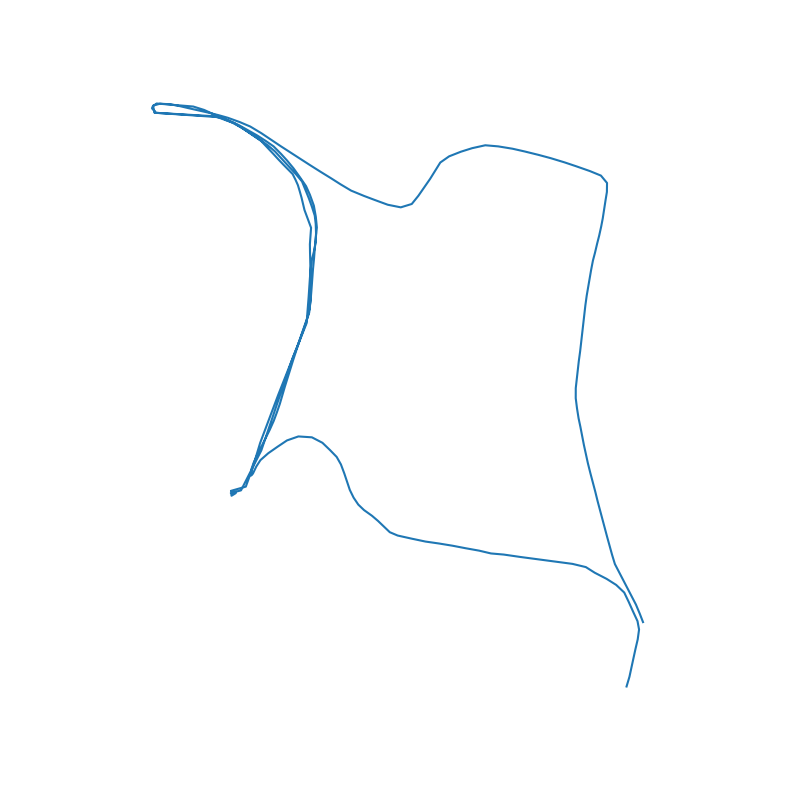

In [3]:
for MMSI in list(has_loitering.keys())[:2]:
    # MMSI에 대한 기록 추출
    rec1 = fuca[fuca['MMSI'] == MMSI].sort_values('BaseDateTime', ascending=True).reset_index(drop=True)

    Dk = rec1['Length'].min() * 0.001 * 4.5
    # print(Dk)

    # stopping points 제거
    index = []      # moving points 저장하는 리스트
    moving_points = []
    cur_loc = rec1.loc[0]
    index.append(0)
    start_index = 0
    end_index = 0
    flag = -1
    moving_points.append((cur_loc['LAT'], cur_loc['LON']))

    for i in range(1, len(rec1)):
        cur_loc = rec1.loc[i]
        prev_loc = moving_points[-1]
        if is_stopping_point(prev_loc, cur_loc):
            if flag == 0:
                start_index = i
                flag = 1
        else:
            if flag == 1:
                end_index = i-1
                flag = 0
                term = pd.to_datetime(rec1['BaseDateTime'][end_index]) - pd.to_datetime(rec1['BaseDateTime'][start_index])
                if term < timedelta(minutes=60):
                    index.extend(x for x in range(start_index, end_index+1))
            elif flag == -1:
                flag = 0

            moving_points.append((cur_loc['LAT'], cur_loc['LON']))
            index.append(i)

    # moving points만 추출
    moving = rec1.reset_index(drop=True).iloc[index].reset_index()

    # grid mapping. z=16
    z = 16
    moving['x'] = ((moving["LON"] + 180) / 360) * (2 ** z)
    moving['y'] = (1 - np.log(np.tan(math.pi * moving["LAT"] / 180) + 1 / np.cos(math.pi * moving["LAT"] / 180)) / math.pi) * (2 ** (z - 1))

    # moving trajectory 시작 index 저장하기
    MT_index = []
    for i in range(1, len(moving['index'])):
        diff = moving['index'][i] - moving['index'][i-1]
        if diff > 1:
            MT_index.append(i)
    # print(len(MT_index))

    # n, c 계산
    cnt = 0
    loitering_index = []
    for i in range(len(MT_index)-1):
        if MT_index[i+1] - MT_index[i] < m: continue
        MT = moving.iloc[MT_index[i]:MT_index[i+1]]
        for k in range(0, len(MT)-m, 30):
            MT1 = MT.iloc[k:k+m]
            n_o = []
            for j in range(len(MT1)):
                n_o.append((np.floor(MT1.iloc[j]['x']), np.floor(MT1.iloc[j]['y'])))
            n_o = len(set(n_o))
            n_c = 0
            for j in range(len(MT1)-1):
                dx = np.abs(np.floor(MT1.iloc[j]['x']) - np.floor(MT1.iloc[j+1]['x']))
                dy = np.abs(np.floor(MT1.iloc[j]['y']) - np.floor(MT1.iloc[j+1]['y']))
                n_c += max(max(dx, dy)-1, 0)
            n = n_o + n_c
            c = ((np.ceil(MT1['x'].max()) - np.floor(MT1['x'].min())) + (np.ceil(MT1['y'].max()) - np.floor(MT1['y'].min()))) * 2
            if n >= c:
                cnt += 1
                loitering_index.append(MT_index[i]+k)
    createDirectory(f"./image/{MMSI}")
    for loit in loitering_index:
        loitering = moving[loit:loit + m]
        loitering.plot(kind='line', x='x', y='y', figsize=(10, 10))
        plt.xlim(loitering['x'].min() - 10, loitering['x'].max() + 10)
        plt.ylim(loitering['y'].min() - 10, loitering['y'].max() + 10)
        plt.axis('off')
        plt.gca().get_legend().remove()
        plt.savefig(f'./image/{MMSI}/{loit}.png', bbox_inches='tight', pad_inches=0)
        break
    cur_num += 1
    break

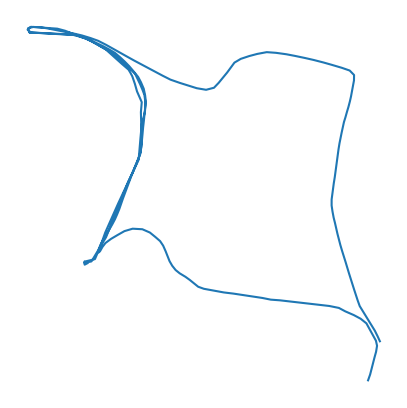

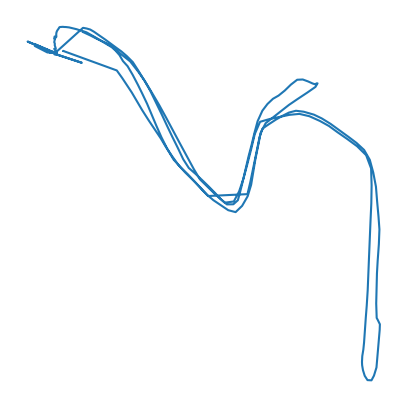

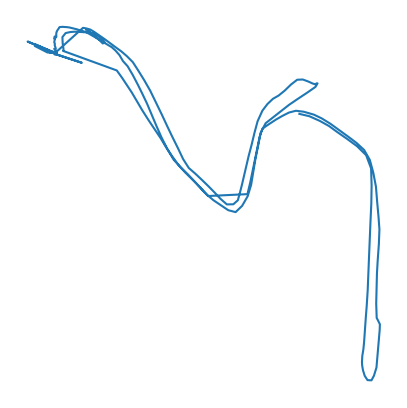

In [9]:
for loit in loitering_index[:3]:
        loitering = moving[loit:loit + m]
        loitering.plot(kind='line', x='x', y='y', figsize=(5, 5.05))
        # plt.xlim(loitering['x'].min() - 10, loitering['x'].max() + 10)
        # plt.ylim(loitering['y'].min() - 10, loitering['y'].max() + 10)
        plt.axis('off')
        plt.gca().get_legend().remove()
        plt.savefig(f'./temp/test.png', dpi=31, bbox_inches='tight', pad_inches=0)


In [ ]:
for loit in loitering_index[:3]:
        loitering = moving[loit:loit + m]
        loitering.plot(kind='line', x='x', y='y', figsize=(4.97, 5))
        # plt.xlim(loitering['x'].min() - 10, loitering['x'].max() + 10)
        # plt.ylim(loitering['y'].min() - 10, loitering['y'].max() + 10)
        plt.axis('off')
        plt.gca().get_legend().remove()
        plt.savefig(f'./image/{MMSI}/{loit}.png', dpi=13 , bbox_inches='tight', pad_inches=0)
